In [1]:
from qiskit import *
import numpy as np

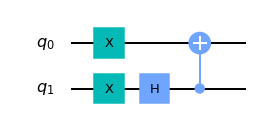

In [2]:
qc_psi_minus = QuantumCircuit(2)
qc_psi_minus.x(0)
qc_psi_minus.x(1)
qc_psi_minus.h(1)
qc_psi_minus.cx(1,0)
qc_psi_minus.draw('mpl')

In [3]:
qc_0_0 = QuantumCircuit(2,2)
qc_0_0.measure([0,1], [0,1])

qc_0_30 = QuantumCircuit(2,2)
qc_0_30.ry(np.pi/3, 1)
qc_0_30.measure([0,1], [0,1])

qc_min30_0 = QuantumCircuit(2,2)
qc_min30_0.ry(-np.pi/3, 0)
qc_min30_0.measure([0,1], [0,1])

qc_min30_30 = QuantumCircuit(2,2)
qc_min30_30.ry(-np.pi/3, 0)
qc_min30_30.ry(np.pi/3, 1)
qc_min30_30.measure([0,1], [0,1])

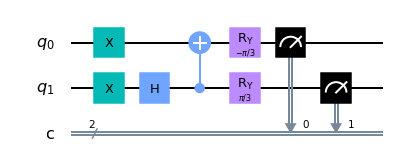

In [4]:
qc_test = qc_psi_minus + qc_min30_30
qc_test.draw('mpl')

In [5]:
batch_size = 2**13   #8192

rand_alice = list(np.random.randint(2,size=batch_size))
rand_bob = list(np.random.randint(2,size=batch_size))


In [6]:
settings_results = [0 for i in range(batch_size)]
key = []

for i in range(batch_size): 
    
    if (rand_alice[i] == 0) and (rand_bob[i] == 0):        
        job = execute(qc_psi_minus + qc_0_0, backend = Aer.get_backend('qasm_simulator'), shots=1)
        k = True
        
    elif (rand_alice[i] == 0) and (rand_bob[i] == 1):        
        job = execute(qc_psi_minus + qc_0_30, backend = Aer.get_backend('qasm_simulator'), shots=1)
        k = False
        
    elif (rand_alice[i] == 1) and (rand_bob[i] == 0):        
        job = execute(qc_psi_minus + qc_min30_0, backend = Aer.get_backend('qasm_simulator'), shots=1)
        k = False
        
    elif (rand_alice[i] == 1) and (rand_bob[i] == 1):        
        job = execute(qc_psi_minus + qc_min30_30, backend = Aer.get_backend('qasm_simulator'), shots=1)
        k = False
    
    
    result = job.result()
    counts = result.get_counts()
    
    
    if '00' in counts.keys():        
        settings_results[i] = [str(rand_alice[i])+str(rand_bob[i]), '00']       #[Polarizers' orientation, result]
    
    elif '01' in counts.keys():         
        settings_results[i] = [str(rand_alice[i])+str(rand_bob[i]), '01']
        if k == True:        
            key.append(0)    
        else:            
            continue
            
    elif '10' in counts.keys():        
        settings_results[i] = [str(rand_alice[i])+str(rand_bob[i]), '10']        
        if k == True:        
            key.append(1)        
        else:            
            continue
    
    elif '11' in counts.keys():         
        settings_results[i] = [str(rand_alice[i])+str(rand_bob[i]), '11']

In [7]:
count_01 = 0
count_01_plus_plus = 0
count_10 = 0
count_10_plus_plus = 0
count_11 = 0
count_11_plus_plus = 0

for i in range(batch_size):
    if settings_results[i][0] == '01':
        count_01 += 1
        if settings_results[i][1] == '00':
            count_01_plus_plus += 1
    elif settings_results[i][0] == '10':
        count_10 += 1
        if settings_results[i][1] == '00':
            count_10_plus_plus += 1
    elif settings_results[i][0] == '11':
        count_11 += 1
        if settings_results[i][1] == '00':
            count_11_plus_plus += 1
    else:
        continue
        
p_01_plus_plus = count_01_plus_plus/count_01
p_10_plus_plus = count_10_plus_plus/count_10
p_11_plus_plus = count_11_plus_plus/count_11

W = p_01_plus_plus + p_10_plus_plus - p_11_plus_plus

print("Private key =", key)
print("Key size =", len(key))
print("W =", W)
if W < 0:
    print('System is secure')
else:
    print('Someone is listening')

Private key = [1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1

In [8]:
#Sanity check

print(p_01_plus_plus) # Theory: 1/8
print(p_10_plus_plus) # Theory: 1/8
print(p_11_plus_plus) # Theory: 3/8

0.125
0.11434204041399704
0.37886340977068794
